# This notebook talke the raw output from Hamiltonian Replica Exchange, extract the dihedral angle from xtc file using MdTraj, and ananlyze the autocoorelation curve

In [50]:
import os, sys, glob, shutil, re
import subprocess

import mdtraj as md
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import math
from IPython.display import Image, display
%matplotlib inline
nmer = 5
mpl.rcParams.update({'font.size': 16})

In [51]:
%pwd

'/Users/starwingchen/Voelz_Lab/git/peptoid_24summer/peptoid/19AE1-4-A/GAFF/protonated/HREX_500ns'

In [4]:
import os
import subprocess

HREX_list = ['.', '../HREX_500ns_2/', '../HREX_500ns_3/', '../HREX_500ns_4/']
for HREX in HREX_list:    
    # Loop through each directory in the current working directory
    for state_dir in os.listdir(HREX):
        state_path = os.path.join(HREX, state_dir)
        if os.path.isdir(state_path) and state_dir.startswith('state_'):
    
            input_gro = os.path.join(state_path, 'HREMD.part0001.gro')
            output_gro = os.path.join(state_path, 'HREMD_withoutwater.part0001.gro')
            command = f'echo "24\nq\n" | gmx editconf -f {input_gro} -n index.ndx -o {output_gro}'
            
            # Run the GROMACS command
            try:
                subprocess.run(command, shell=True, check=True)
                print(f"Processed {input_gro}")
            except subprocess.CalledProcessError as e:
                print(f"Failed to process {input_gro}: {e}")
           
            # Remove all files with # in their names
            rm_command = f'rm -f {os.path.join(state_path, "#*")}'
            try:
                subprocess.run(rm_command, shell=True, check=True)
                print(f"Removed # files in {state_path}")
            except subprocess.CalledProcessError as e:
                print(f"Failed to remove # files in {state_path}: {e}")


                     :-) GROMACS - gmx editconf, 2020.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.3664 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed ./state_3/HREMD.part0001.gro
Removed # files in ./state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.2165 nm^3, corresponds to roughly 23000 electrons
Velocities found
Selected 24: 'peptoid'
Processed ./state_4/HREMD.part0001.gro
Removed # files in ./state_4
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.5366 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed ./state_5/HREMD.part0001.gro
Removed # files in ./state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.3337 nm^3, corresponds to roughly 23100 el


Select a group for output:
Group     0 (         System) has  5093 elements
Group     1 (          Other) has    80 elements
Group     2 (            NAE) has    34 elements
Group     3 (            NPE) has    46 elements
Group     4 (             CL) has     3 elements
Group     5 (        Protein) has     3 elements
Group     6 (      Protein-H) has     1 elements
Group     7 (        C-alpha) has     0 elements
Group     8 (       Backbone) has     1 elements
Group     9 (      MainChain) has     1 elements
Group    10 (   MainChain+Cb) has     1 elements
Group    11 (    MainChain+H) has     1 elements
Group    12 (      SideChain) has     2 elements
Group    13 (    SideChain-H) has     0 elements
Group    14 (    Prot-Masses) has     3 elements
Group    15 (    non-Protein) has  5090 elements
Group    16 (          Water) has  5007 elements
Group    17 (            SOL) has  5007 elements
Group    18 (      non-Water) has    86 elements
Group    19 (            Ion) has     3 e

Removed # files in ./state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.2434 nm^3, corresponds to roughly 23000 electrons
Velocities found
Selected 24: 'peptoid'
Processed ./state_1/HREMD.part0001.gro
Removed # files in ./state_1
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 50.6744 nm^3, corresponds to roughly 22800 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_2/state_3/HREMD.part0001.gro
Removed # files in ../HREX_500ns_2/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.1173 nm^3, corresponds to roughly 23000 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_2/state_4/HREMD.part0001.gro
Removed # files in ../HREX_500ns_2/state_4
Note that major changes are planned in future for editconf, to improve usabili


Select a group for output:
Group     0 (         System) has  5093 elements
Group     1 (          Other) has    80 elements
Group     2 (            NAE) has    34 elements
Group     3 (            NPE) has    46 elements
Group     4 (             CL) has     3 elements
Group     5 (        Protein) has     3 elements
Group     6 (      Protein-H) has     1 elements
Group     7 (        C-alpha) has     0 elements
Group     8 (       Backbone) has     1 elements
Group     9 (      MainChain) has     1 elements
Group    10 (   MainChain+Cb) has     1 elements
Group    11 (    MainChain+H) has     1 elements
Group    12 (      SideChain) has     2 elements
Group    13 (    SideChain-H) has     0 elements
Group    14 (    Prot-Masses) has     3 elements
Group    15 (    non-Protein) has  5090 elements
Group    16 (          Water) has  5007 elements
Group    17 (            SOL) has  5007 elements
Group    18 (      non-Water) has    86 elements
Group    19 (            Ion) has     3 e

Removed # files in ../HREX_500ns_2/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.4726 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_2/state_2/HREMD.part0001.gro
Removed # files in ../HREX_500ns_2/state_2
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.7604 nm^3, corresponds to roughly 23200 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_2/state_0/HREMD.part0001.gro
Removed # files in ../HREX_500ns_2/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.5366 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_2/state_1/HREMD.part0001.gro
Removed # files in ../HREX_500ns_2/state_1
Note that major changes are planned 


Select a group for output:
Group     0 (         System) has  5093 elements
Group     1 (          Other) has    80 elements
Group     2 (            NAE) has    34 elements
Group     3 (            NPE) has    46 elements
Group     4 (             CL) has     3 elements
Group     5 (        Protein) has     3 elements
Group     6 (      Protein-H) has     1 elements
Group     7 (        C-alpha) has     0 elements
Group     8 (       Backbone) has     1 elements
Group     9 (      MainChain) has     1 elements
Group    10 (   MainChain+Cb) has     1 elements
Group    11 (    MainChain+H) has     1 elements
Group    12 (      SideChain) has     2 elements
Group    13 (    SideChain-H) has     0 elements
Group    14 (    Prot-Masses) has     3 elements
Group    15 (    non-Protein) has  5090 elements
Group    16 (          Water) has  5007 elements
Group    17 (            SOL) has  5007 elements
Group    18 (      non-Water) has    86 elements
Group    19 (            Ion) has     3 e

Removed # files in ../HREX_500ns_3/state_3
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.3304 nm^3, corresponds to roughly 23000 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_3/state_4/HREMD.part0001.gro
Removed # files in ../HREX_500ns_3/state_4
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.3888 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_3/state_5/HREMD.part0001.gro
Removed # files in ../HREX_500ns_3/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.2612 nm^3, corresponds to roughly 23000 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_3/state_2/HREMD.part0001.gro
Removed # files in ../HREX_500ns_3/state_2


                     :-) GROMACS - gmx editconf, 2020.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.3934 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_3/state_0/HREMD.part0001.gro
Removed # files in ../HREX_500ns_3/state_0
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.4917 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_3/state_1/HREMD.part0001.gro
Removed # files in ../HREX_500ns_3/state_1
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 50.6945 nm^3, corresponds to roughly 22800 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_4/state_3/HREMD.part0001.gro
Removed # files in ../HREX_500ns_4/state_3
Note that major changes are planned in future for editconf, to improve usabilit

                     :-) GROMACS - gmx editconf, 2020.5 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
    

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.9452 nm^3, corresponds to roughly 23300 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_4/state_5/HREMD.part0001.gro
Removed # files in ../HREX_500ns_4/state_5
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.8801 nm^3, corresponds to roughly 23300 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_4/state_2/HREMD.part0001.gro
Removed # files in ../HREX_500ns_4/state_2
Note that major changes are planned in future for editconf, to improve usability and utility.
Read 5093 atoms
Volume: 51.4245 nm^3, corresponds to roughly 23100 electrons
Velocities found
Selected 24: 'peptoid'
Processed ../HREX_500ns_4/state_0/HREMD.part0001.gro
Removed # files in ../HREX_500ns_4/state_0
Note that major changes are planned in future for editconf, to improve usabilit

In [52]:
# Define the directory path
directory = "omega_data/"

# Check if the directory exists
if os.path.exists(directory):
    # Remove all contents of the directory
    shutil.rmtree(directory)
    # Recreate the empty directory
    os.makedirs(directory)
    print(f"All contents in '{directory}' have been cleared.")
else:
    # Create the directory if it does not exist
    os.makedirs(directory)
    print(f"Directory '{directory}' did not exist, so it has been created.")


All contents in 'omega_data/' have been cleared.


In [53]:
# Search the dihedral index 
pattern = r' CA-     C-     N-    CA' # Backbone dihedral we want 
gmx_dihedral_indices = []

with open('19AE1-4-A_fep.itp', 'r') as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            parts = line.strip().split()
            dihedral = parts[:4] # Extract the dihedral index 
            if dihedral not in gmx_dihedral_indices:
                gmx_dihedral_indices.append(dihedral)

gmx_dihedral_indices = np.array(gmx_dihedral_indices, dtype=int)
print(gmx_dihedral_indices)
print(f"gmx_dihedral_indices.shape : {gmx_dihedral_indices.shape}")

[[ 5  6 19 28]
 [28 29 42 46]
 [46 47 58 67]]
gmx_dihedral_indices.shape : (3, 4)


In [54]:
# Define omega dihedral indices, gromcas start from 1, while np start from 0
omega_dihedral_indices = gmx_dihedral_indices - 1
print(omega_dihedral_indices)

# Ensure the omega_data directory exists
omega_path = 'omega_data/'
if not os.path.exists(omega_path):
    os.makedirs(omega_path)

HREX_list = ['./', '../HREX_500ns_2/', '../HREX_500ns_3/', '../HREX_500ns_4/']

for state in range(6):
    omegas_list = []
    for HREX in HREX_list:
        xtcfile = f"{HREX}state_{state}/HREMD.part0001.xtc"
        grofile = f"{HREX}state_{state}/HREMD_withoutwater.part0001.gro"
        
        # Load the trajectory
        traj = md.load(xtcfile, top=grofile)
        
        # Compute omega dihedrals
        omegas = md.compute_dihedrals(traj, omega_dihedral_indices) * (180.0 / math.pi)
        omegas_list.append(omegas)
    # Save omegas
    concatenated_omegas = np.vstack(omegas_list)
    outfile = os.path.join(omega_path, f"omegas_state{state}.npy")
    np.save(outfile, concatenated_omegas)
    print(f"Saved omegas for state {state} to {outfile}")

[[ 4  5 18 27]
 [27 28 41 45]
 [45 46 57 66]]
Saved omegas for state 0 to omega_data/omegas_state0.npy
Saved omegas for state 1 to omega_data/omegas_state1.npy
Saved omegas for state 2 to omega_data/omegas_state2.npy
Saved omegas for state 3 to omega_data/omegas_state3.npy
Saved omegas for state 4 to omega_data/omegas_state4.npy
Saved omegas for state 5 to omega_data/omegas_state5.npy


In [55]:
print(np.load('omega_data/omegas_state0.npy')[:5])
print(np.load('omega_data/omegas_state0.npy').shape)

[[-167.01532 -174.34724 -133.60951]
 [-160.42911 -172.5973  -171.20451]
 [-165.90155  172.99641 -163.39728]
 [ 151.33412  179.10626  179.16806]
 [-161.3681   144.2551   162.04622]]
(200004, 3)


### What is the time interval between `*.xtc` snapshots?

In [56]:
%cat prod_fep.mdp | grep nstxout-compressed

nstxout-compressed      = 5000      ; save compressed coordinates every 10.0 ps


In [57]:
dt_in_ns = 0.010   #  ns

### What are the dimensions of the omega-angle arrays in each Hamiltonian state? 

In [58]:
nstates = 6

for i in range(nstates):
    omegas = np.load(f"omega_data/omegas_state{i}.npy")
    print(f'state {i}:, {omegas.shape}')

state 0:, (200004, 3)
state 1:, (200004, 3)
state 2:, (200004, 3)
state 3:, (200004, 3)
state 4:, (200004, 3)
state 5:, (200004, 3)


In [23]:
HREX_list = ['./', '../HREX_500ns_2/', '../HREX_500ns_3/', '../HREX_500ns_4/']
current_state = [0, 1, 2, 3, 4, 5]
logfile = f"{HREX}state_0/HREMD.part0001.log"
pattern = 'Repl ex'
output_file = 'replica_indices.dat'

states = []
states.append( current_state.copy() ) # Make a copy of initial_state

# DEbug:  Let's see if xtc is written BEFORE swap 
states.append( current_state.copy() ) # Make a copy of initial_state

VERBOSE = False

for HREX in HREX_list:
    try:
        logfile = os.path.join(HREX, 'state_0/HREMD.part0001.log')
        with open(logfile, 'r') as file:
            lines = file.readlines()

            for line in lines:
                if pattern in line:
                    parts = line.strip().split()
                    if VERBOSE:
                        print(f'parts: {parts}')
                    for i in range(2, len(parts)):
                        if 'x' in parts[i]:
                            index1 = int(parts[i-1])
                            index2 = int(parts[i+1])
                            
                            # Swap the positions in the current state
                            tmp1, tmp2 = current_state[index1], current_state[index2]
                            current_state[index1] = tmp2
                            current_state[index2] = tmp1
                    states.append(current_state.copy())  # Append a copy of the last state
        
        # Append twice for the last frame
        states.append(current_state.copy())
        states.append(current_state.copy())

    except FileNotFoundError:
        print(f"The file {logfile} does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Remove the final two lines from states
if len(states) > 2:
    states = states[:-2]


# Write states to output_file
with open(output_file, 'w') as outfile:
    for state in states:
        outfile.write(' '.join(map(str, state)) + '\n')

print(f"Output saved to {output_file}")


Output saved to replica_indices.dat


In [59]:
all_omegas = [] # Load in the omega values for all replicas
for state in range(6):  # Adjust the range to include all replicas
    all_omegas.append(np.load(f"omega_data/omegas_state{state}.npy"))
all_omegas = np.array(all_omegas)  # (nreps, nsnaps, nresidues)
print('all_omegas.shape', all_omegas.shape)
#print(all_omegas[:5])

# Arrange each snapshot by replica (not temp)
replica_indices = np.loadtxt('replica_indices.dat')
print("replica_indices.shape", replica_indices.shape)
#print(replica_indices)

all_omegas_by_replica = np.zeros(all_omegas.shape)

start = 0
nsnaps = 200004
nreps = 6
for i in range(nsnaps):
    Ind = np.argsort(replica_indices[i, :])
    all_omegas_by_replica[:, i, :] = all_omegas[Ind, i, :]

# Save the data for each state once
for rep in range(nreps):
    np.save(f"omega_data/omegas_rep{rep}.npy", all_omegas_by_replica[rep, :, :])
    print(f"Saved omegas for replica {rep} to omega_data/omegas_rep{rep}.npy")
    #print(np.load(f'omega_data/omegas_rep{rep}.npy')[:5])

all_omegas.shape (6, 200004, 3)
replica_indices.shape (200004, 6)
Saved omegas for replica 0 to omega_data/omegas_rep0.npy
Saved omegas for replica 1 to omega_data/omegas_rep1.npy
Saved omegas for replica 2 to omega_data/omegas_rep2.npy
Saved omegas for replica 3 to omega_data/omegas_rep3.npy
Saved omegas for replica 4 to omega_data/omegas_rep4.npy
Saved omegas for replica 5 to omega_data/omegas_rep5.npy


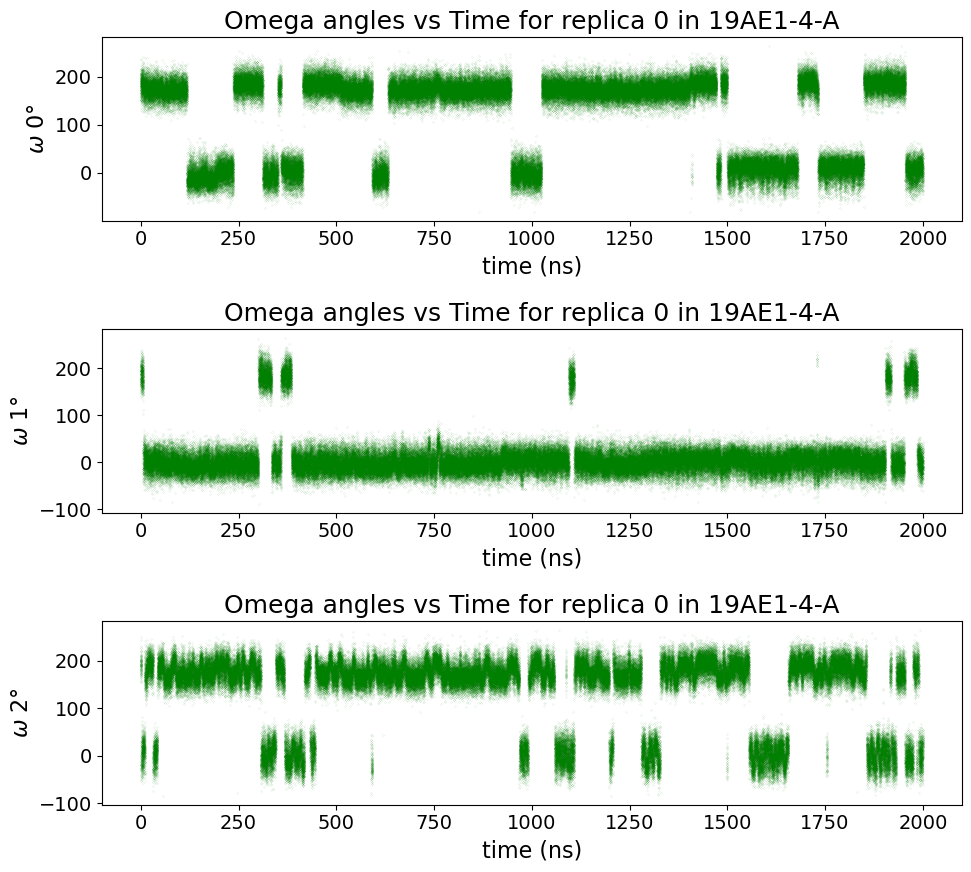

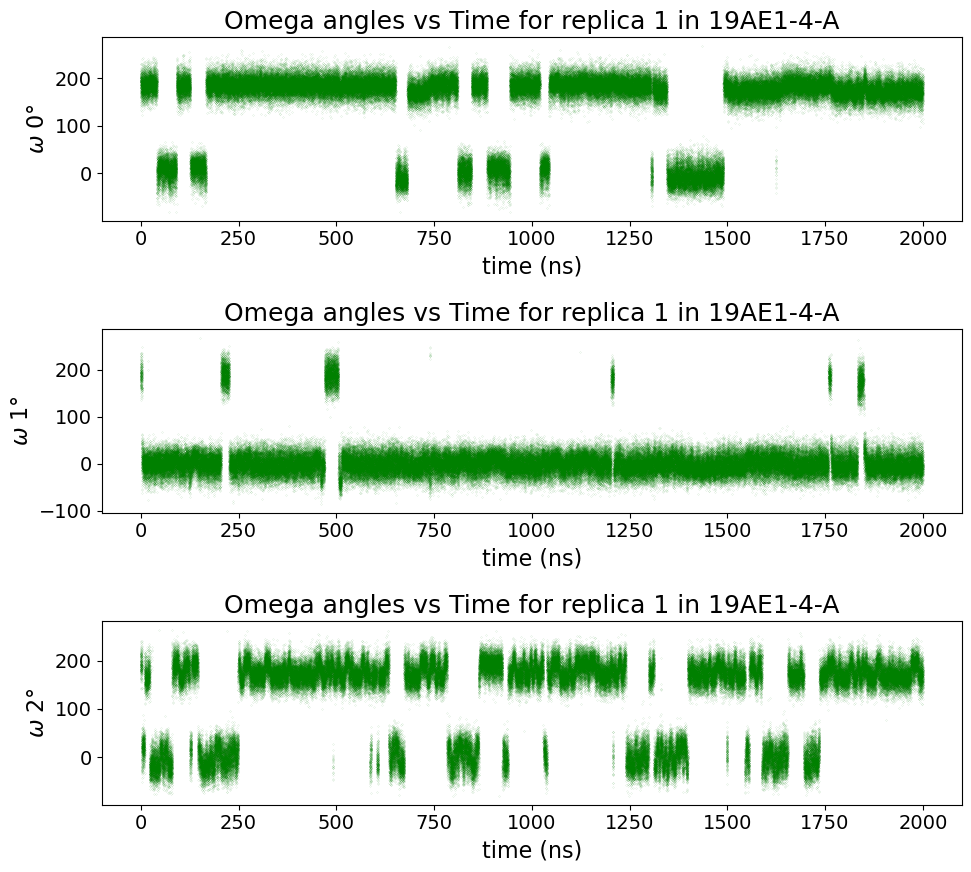

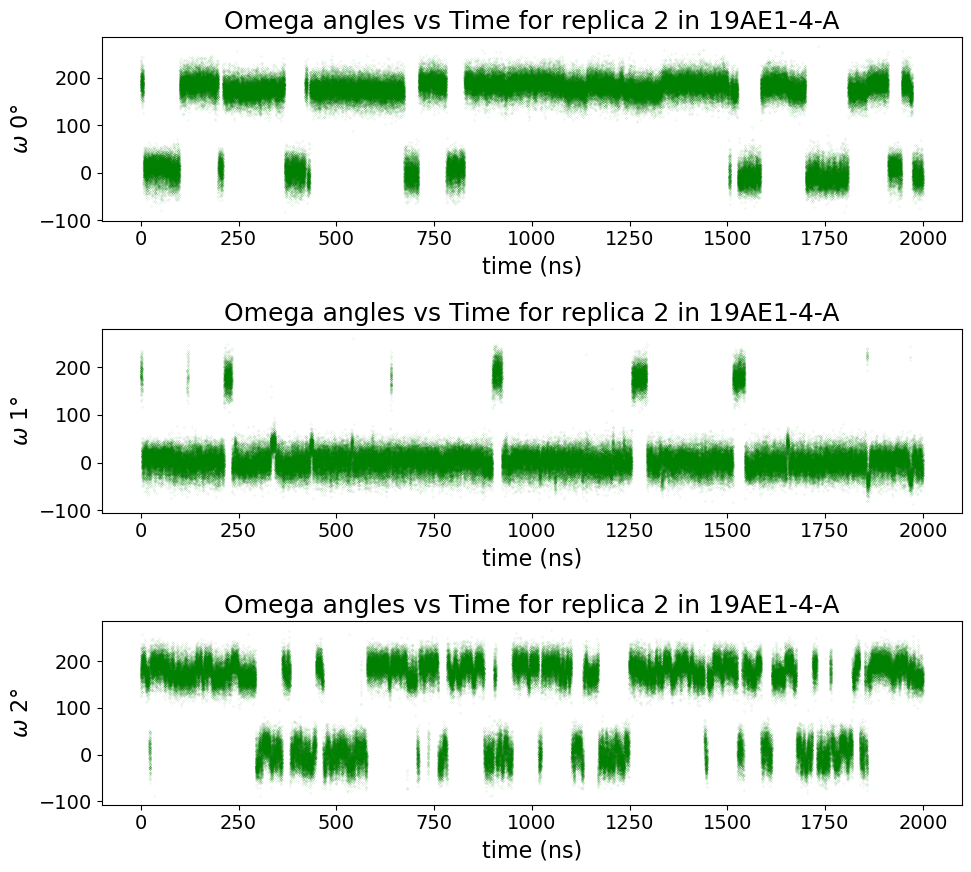

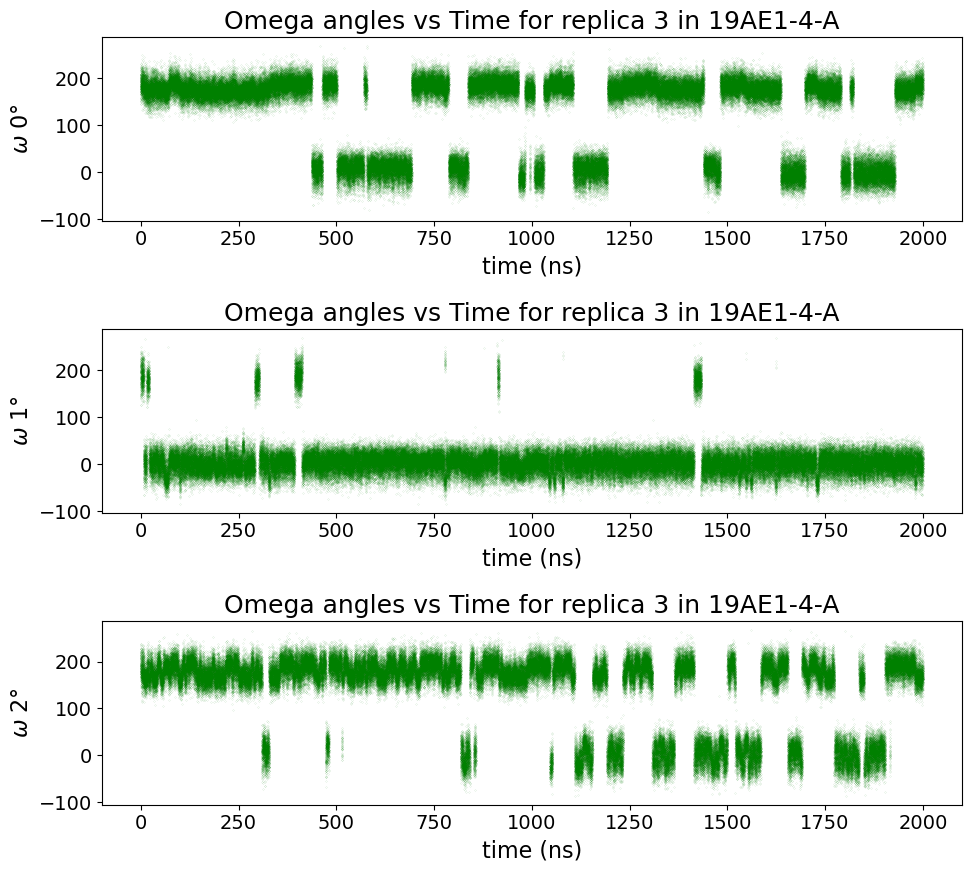

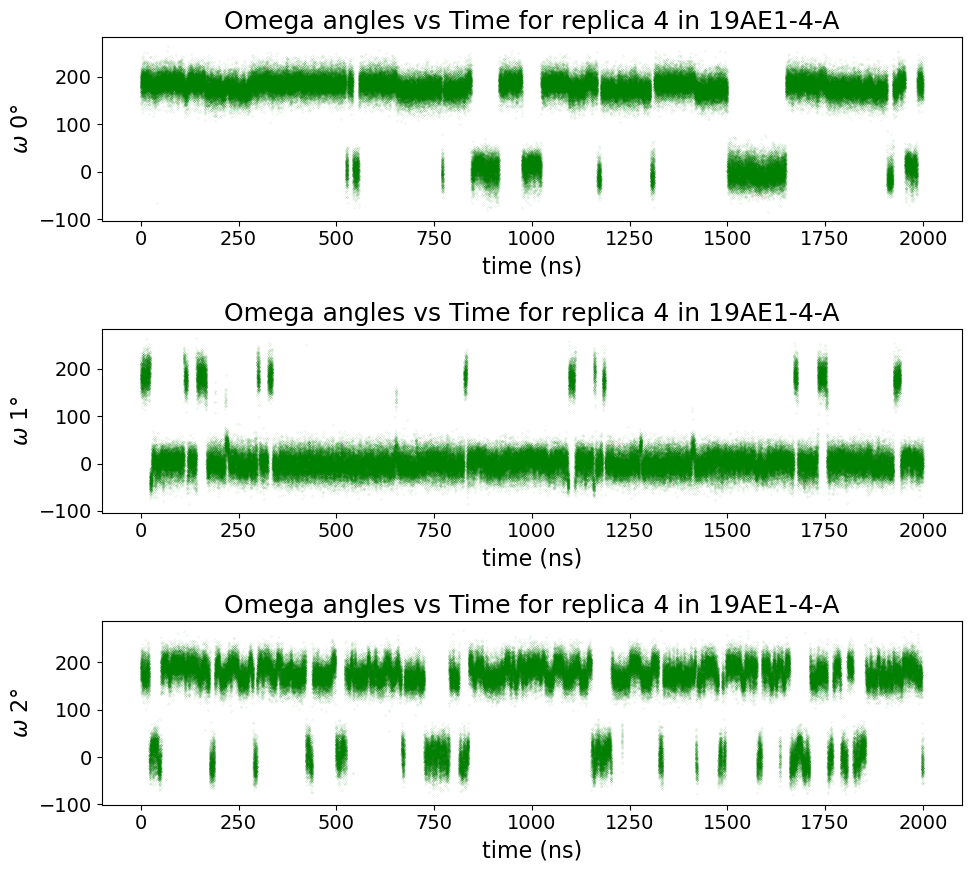

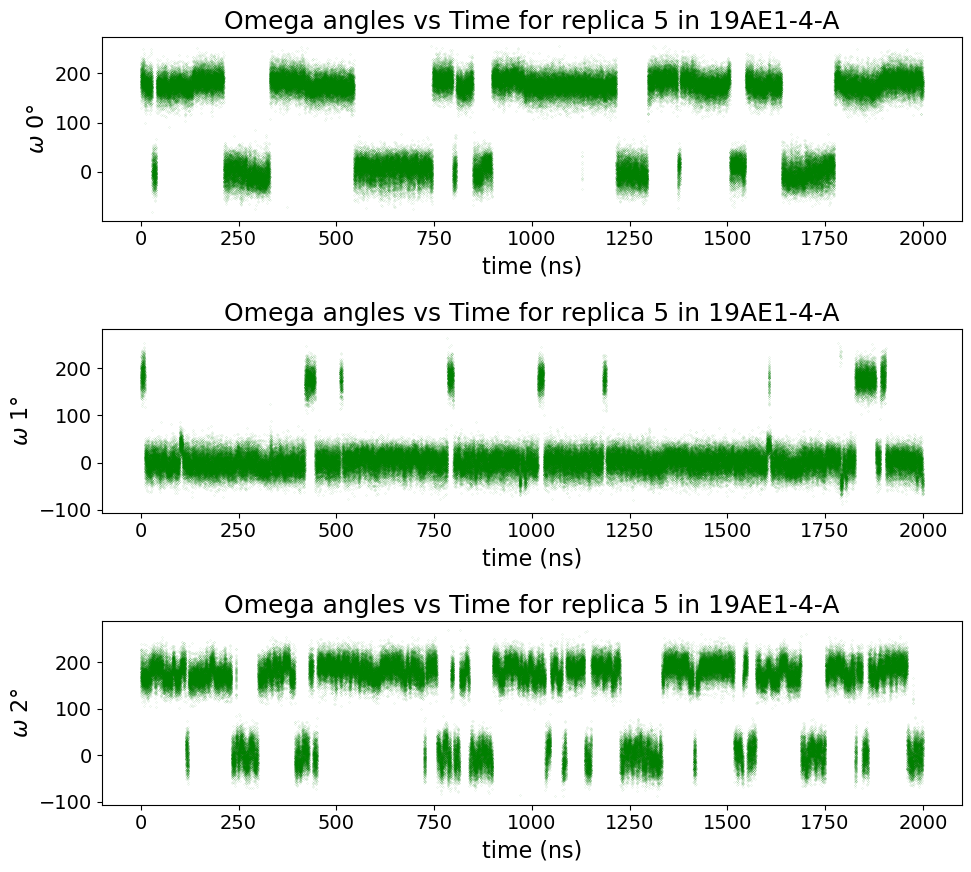

In [61]:
# Adjust omega values into the range (-90, 270)
all_omegas_by_replica = (all_omegas_by_replica + 90.0) % 360.0 - 90.0

start = 0
nsnaps = 200004
nreps = 6
residues_to_plot = [0, 1, 2]
num_residues = len(residues_to_plot)

ShowPlots = True

# Set default font sizes globally
plt.rc('font', size=16)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)   # fontsize of the tick labels
plt.rc('ytick', labelsize=14)   # fontsize of the tick labels
plt.rc('legend', fontsize=18)   # legend fontsize

# Plot omega angles vs time for selected residues for each replica
for i in range(nreps):
    plt.figure(figsize=(10, 9))
    for panel, residue in enumerate(residues_to_plot, 1):
        plt.subplot(num_residues, 1, panel)
        t = np.arange(start, nsnaps) * 0.010  # Time axis in ns
        plt.plot(t, all_omegas_by_replica[i, start:nsnaps, residue], '.', ms=0.1, color='green')
        plt.xlabel('time (ns)')
        plt.ylabel(f'$\\omega$ {residue}°')
        plt.title(f'Omega angles vs Time for replica {i} in 19AE1-4-A')
        
    plt.tight_layout()
    if ShowPlots:
        plt.show()
    else:
        outfilename = f'omega_data/Omega_angles_vs_Time_Replica_{i}_in_19AE1-4-A.png'
        plt.savefig(outfilename, format='png', transparent=True, dpi=600)
        print(f"Saved at: {outfilename}")
        plt.clf()  # Clear the figure for the next set of plots